**Завдання**



В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.



На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.



Порівняйте результати та зробіть висновки.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense
import tensorflow as tf
from tensorflow.keras.backend import clear_session

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
learning_rate = 0.001 # швидкість навчання нейронної мережі

Завантажимо та підготуємо датасет:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Побудуємо модель з простим рекурентним шаром, проведемо її навчання та введемо результати:

In [7]:
clear_session()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Точність на тестових даних:', test_acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - acc: 0.5284 - loss: 0.6897 - val_acc: 0.7009 - val_loss: 0.6151
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - acc: 0.7541 - loss: 0.5322 - val_acc: 0.6211 - val_loss: 0.6486
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - acc: 0.7910 - loss: 0.4642 - val_acc: 0.7148 - val_loss: 0.5640
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - acc: 0.9341 - loss: 0.2101 - val_acc: 0.7488 - val_loss: 0.5566
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - acc: 0.9872 - loss: 0.0734 - val_acc: 0.7653 - val_loss: 0.5833
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - acc: 0.9984 - loss: 0.0256 - val_acc: 0.7617 - val_loss: 0.6338
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - acc: 0.9999 - loss: 0.0115 - val_acc: 0.7751 - val_loss: 0.6476
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - acc: 1.0000 - loss: 0.0058 - val_acc: 0.7731 - val_loss: 0.6802
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/

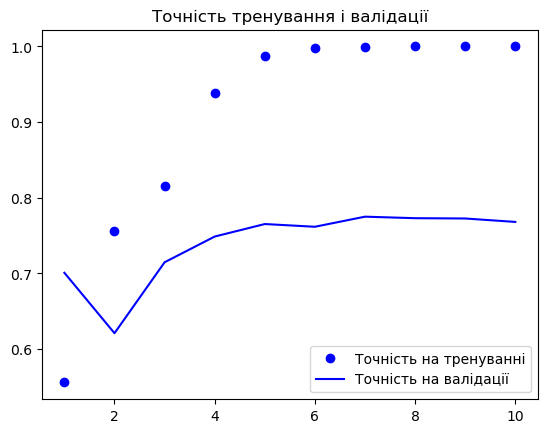

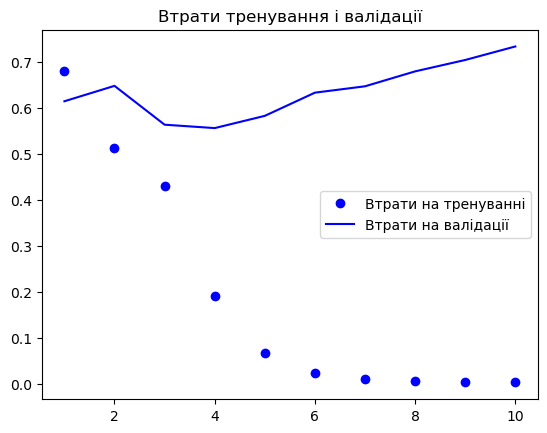

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Як бачимо ми швидко досягли точності класифікацї близько 80%, а потім модель почала перенавчатися. Спробуємо навчити модель з шаром LSTM:

In [12]:
clear_session()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Точність на тестових даних:', test_acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 167ms/step - acc: 0.6295 - loss: 0.6343 - val_acc: 0.8221 - val_loss: 0.3991
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - acc: 0.8600 - loss: 0.3445 - val_acc: 0.8636 - val_loss: 0.3297
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - acc: 0.9200 - loss: 0.2238 - val_acc: 0.8784 - val_loss: 0.2941
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 175ms/step - acc: 0.9457 - loss: 0.1611 - val_acc: 0.8799 - val_loss: 0.3140
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - acc: 0.9570 - loss: 0.1294 - val_acc: 0.8743 - val_loss: 0.3526
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - acc: 0.9622 - loss: 0.1133 - val_acc: 0.8783 - val_loss: 0.3678
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - acc: 0.9758 - loss: 0.0818 - val_acc: 0.8747 - val_loss: 0.3994
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - acc: 0.9752 - loss: 0.0799 - val_acc: 0.8684 - val_loss: 0.4383
Epoch 9/10
137/137 ━━━━━━━━━━━━━

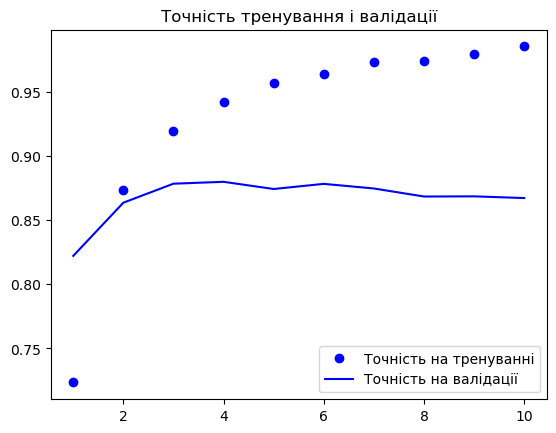

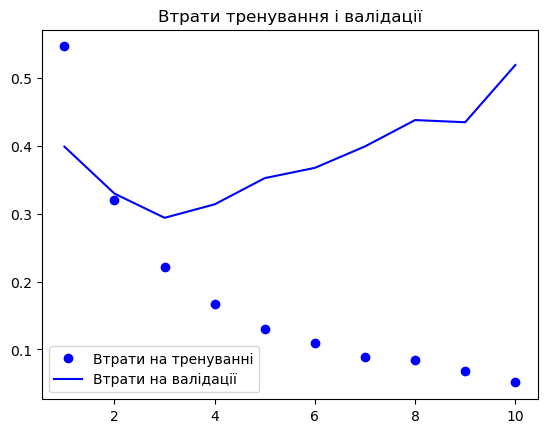

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Спробуємо також модель з шаром GRU:

In [16]:
clear_session()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Точність на тестових даних:', test_acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 24s 168ms/step - acc: 0.6040 - loss: 0.6501 - val_acc: 0.8465 - val_loss: 0.3665
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - acc: 0.8707 - loss: 0.3121 - val_acc: 0.8544 - val_loss: 0.3410
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - acc: 0.9206 - loss: 0.2175 - val_acc: 0.8603 - val_loss: 0.3441
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - acc: 0.9394 - loss: 0.1740 - val_acc: 0.8643 - val_loss: 0.3557
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - acc: 0.9507 - loss: 0.1437 - val_acc: 0.8512 - val_loss: 0.4057
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 152ms/step - acc: 0.9544 - loss: 0.1291 - val_acc: 0.8656 - val_loss: 0.4180
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 154ms/step - acc: 0.9693 - loss: 0.0993 - val_acc: 0.8503 - val_loss: 0.4514
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - acc: 0.9690 - loss: 0.1005 - val_acc: 0.8559 - val_loss: 0.4601
Epoch 9/10
137/137 ━━━━━━━━━━━━━

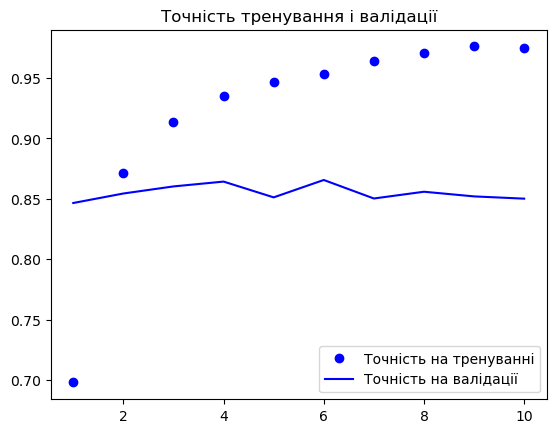

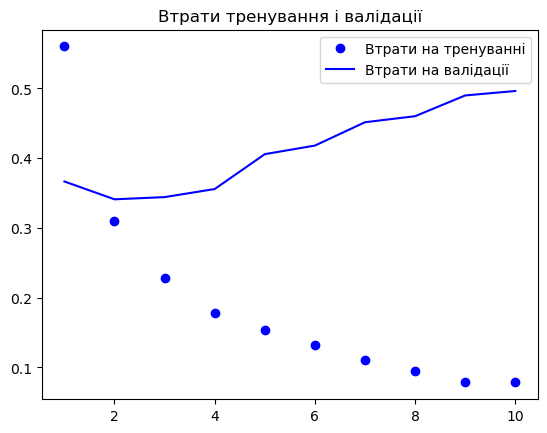

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

А тепер спробуємо модель з двонапрямленим шаром LSTM:

In [20]:
clear_session()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Точність на тестових даних:', test_acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 226ms/step - acc: 0.5967 - loss: 0.6633 - val_acc: 0.8048 - val_loss: 0.4838
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - acc: 0.8352 - loss: 0.4057 - val_acc: 0.8581 - val_loss: 0.3459
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 267ms/step - acc: 0.9023 - loss: 0.2625 - val_acc: 0.8723 - val_loss: 0.3145
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 243ms/step - acc: 0.9350 - loss: 0.1942 - val_acc: 0.8780 - val_loss: 0.3065
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 255ms/step - acc: 0.9554 - loss: 0.1442 - val_acc: 0.8820 - val_loss: 0.3449
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - acc: 0.9643 - loss: 0.1207 - val_acc: 0.8808 - val_loss: 0.3557
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - acc: 0.9615 - loss: 0.1193 - val_acc: 0.8751 - val_loss: 0.3840
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 252ms/step - acc: 0.9742 - loss: 0.0885 - val_acc: 0.8756 - val_loss: 0.4219
Epoch 9/10
137/137 ━━━━━━━━━━━━━

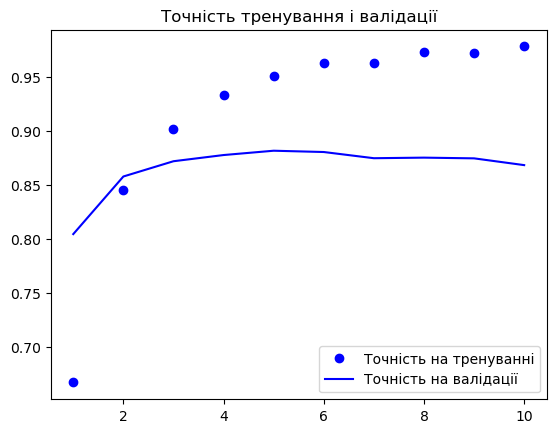

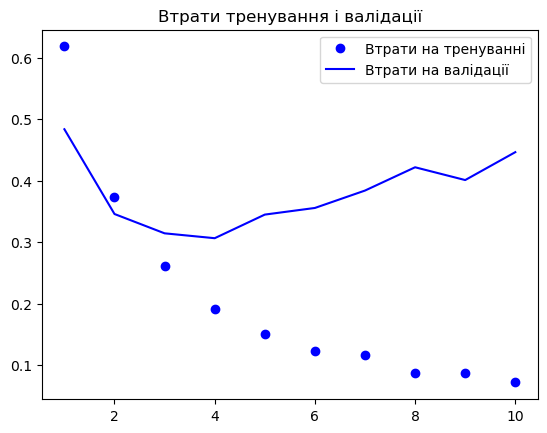

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

І нарешті спробуємо більш складну глибоку модель з двома двонапрямленими шарами LSTM:

In [24]:
clear_session()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Точність на тестових даних:', test_acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 449ms/step - acc: 0.6431 - loss: 0.6051 - val_acc: 0.8459 - val_loss: 0.3670
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 466ms/step - acc: 0.8606 - loss: 0.3349 - val_acc: 0.8552 - val_loss: 0.3552
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 64s 467ms/step - acc: 0.9077 - loss: 0.2512 - val_acc: 0.8731 - val_loss: 0.3301
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 459ms/step - acc: 0.9398 - loss: 0.1742 - val_acc: 0.8612 - val_loss: 0.3590
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 460ms/step - acc: 0.9569 - loss: 0.1395 - val_acc: 0.8720 - val_loss: 0.3707
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 438ms/step - acc: 0.9678 - loss: 0.1081 - val_acc: 0.8653 - val_loss: 0.4067
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 435ms/step - acc: 0.9738 - loss: 0.0942 - val_acc: 0.8591 - val_loss: 0.4512
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 441ms/step - acc: 0.9815 - loss: 0.0684 - val_acc: 0.8632 - val_loss: 0.4550
Epoch 9/10
137/137 ━━━━━━━━━━━━━

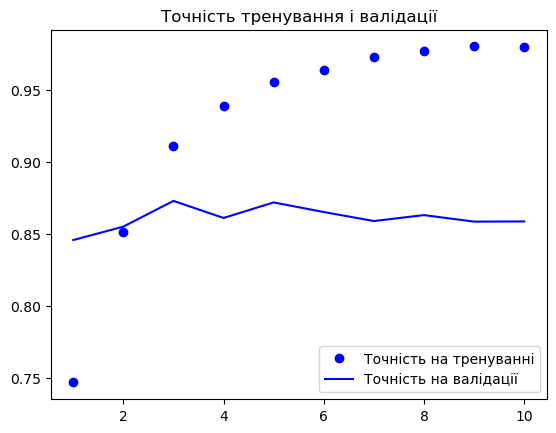

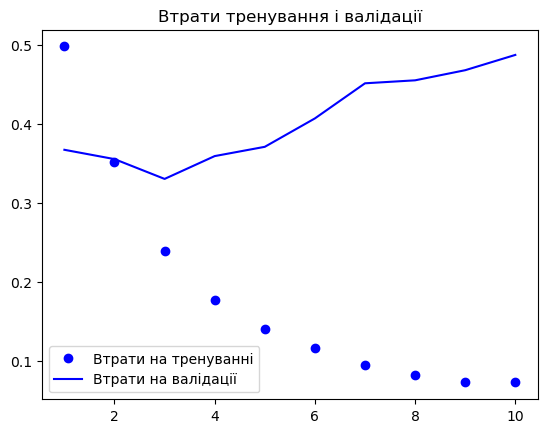

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Тепер збільшимо batch_size у останньої моделі:

In [26]:
clear_session()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(input_train, y_train, epochs=10, batch_size=512, validation_split=0.3)

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Точність на тестових даних:', test_acc)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - acc: 0.5644 - loss: 0.6805 - val_acc: 0.7649 - val_loss: 0.5089
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - acc: 0.8043 - loss: 0.4415 - val_acc: 0.8281 - val_loss: 0.4061
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - acc: 0.8872 - loss: 0.2927 - val_acc: 0.8687 - val_loss: 0.3192
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - acc: 0.9272 - loss: 0.2050 - val_acc: 0.8749 - val_loss: 0.3088
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - acc: 0.9532 - loss: 0.1497 - val_acc: 0.8817 - val_loss: 0.3355
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - acc: 0.9702 - loss: 0.1036 - val_acc: 0.8735 - val_loss: 0.3879
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - acc: 0.9776 - loss: 0.0841 - val_acc: 0.8737 - val_loss: 0.4005
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - acc: 0.9802 - loss: 0.0746 - val_acc: 0.8649 - val_loss: 0.4239
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - acc: 0.9842 - loss: 

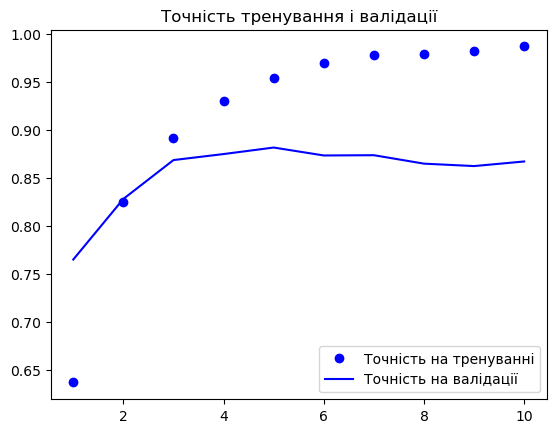

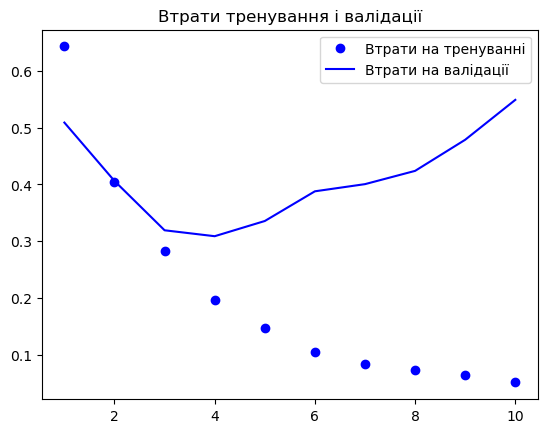

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

**Висновок**

У всіх випадках навчання розглянутих моделей ми отримали схожий результат - швидке навчання моделі до більш-менш прийнятного рівня точності й подальше перенавчання. При цьому Simple RNN модель показала точність на тестових даних близько 80%, GRU модель майже 84%, а LSTM моделі (звичайна, двонапрямлена та глибока) - більш, ніж 85%. Намагання підвищити точність до 90% та більше потребує подальших досліджень та вочевидь ускладнення розглянутих моделей.